### Условия:

$f(x, y) = \arctan(x + y)$

$G=[−9, 31] × [−8, 81]$

### Импортируем необходимые библиотеки и введём константы:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X_START = -9
X_END = 31
Y_START = -8
Y_END = 81

### Посмотрим на график:

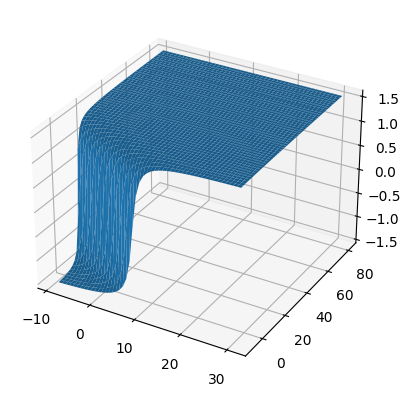

In [14]:
plt_x = np.linspace(X_START, X_END, 50)
plt_y = np.linspace(Y_START, Y_END, 50)

plt_x, plt_y = np.meshgrid(plt_x, plt_y)

plt_z = np.arctan(plt_x + plt_y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plt_x, plt_y, plt_z)

plt.show()

### Функция $\arctan$ - непрерывная, можем найти интеграл:

$\int\limits_{ -9}^{ 31} dx \int\limits_{ -8}^{ 81} \arctan(x+y) dy = -264\arctan(23) - 144\arctan(17) - 56\log(12545) + 36\log(5185) - 5183\arctan(72)/2 + 17\log(290)/2 + 23\log(530)/2 + 12543\arctan(112)/2 \approx 5039.357 $

### Определим функцию вычисления интеграла при помощи нижней или верхней суммы Дарбу:

In [15]:
def calc_integral(axis_div_num, x_start=X_START, y_start=Y_START, x_end=X_END, y_end=Y_END, lower=True):
    # Подстраиваем входные значения области, чтобы они не выходили за пределы G
    x_start = np.clip(x_start, X_START, X_END)
    y_start = np.clip(y_start, Y_START, Y_END)
    x_end = np.clip(x_end, X_START, X_END)
    y_end = np.clip(y_end, Y_START, Y_END)

    x_step = (x_end - x_start) / axis_div_num
    y_step = (y_end - y_start) / axis_div_num
    mu = x_step * y_step # Мера Жордана одна для всех участков
    integral = 0
    for x in np.linspace(x_start, x_end, axis_div_num, endpoint=False):
        for y in np.linspace(y_start, y_end, axis_div_num, endpoint=False):
            if lower:
                integral += np.arctan(x + y) * mu # Из свойств нашей функции понятно, что для нахождения минимального значения на участке нужно брать наименьшие x и y
            else:
                integral += np.arctan((x + x_step) + (y + y_step)) * mu # Для максимальных значений - максимальные x и y
    return integral


### Протестируем её:

In [18]:
axis_div_num = 1000

print(calc_integral(axis_div_num))
print(calc_integral(axis_div_num, lower=False))


5035.915941997595
5042.787421285308


#### что похоже на правду

### Вычислим ошибку:

$I = \int\limits_{-9}^{31} dx \int\limits_{-8}^{81} \arctan(x+y) dy = \sum\limits_{i=1}^{k-1} \int\limits_{x_i}^{x_{i+1}} dx \sum\limits_{j=1}^{l-1} \int\limits_{y_j}^{y_{j+1}} \arctan(x+y) dy = \sum\limits_{i=1}^{k-1} \int\limits_{x_i}^{x_{i+1}} dx \sum\limits_{j=1}^{l-1} \int\limits_{y_j}^{y_{j+1}} \left( \arctan(x_i+y_j) + o\left( \sqrt{(\Delta x)^2 + (\Delta y)^2}\right)\right) dy$ 

$= I_* + \sum\limits_{i=1}^{k-1} \int\limits_{x_i}^{x_{i+1}} dx \sum\limits_{j=1}^{l-1} \int\limits_{y_j}^{y_{j+1}} o\left( \sqrt{(\Delta x)^2 + (\Delta y)^2}\right) dy = I_* + o\left( \sqrt{(\Delta x)^2 + (\Delta y)^2}\right)S$

$S = \left(31 - (-9)\right) \cdot \left(81 - (-8)\right) = 3471$ - площадь области

$I-I_* = 3471\cdot o\left( \sqrt{(\Delta x)^2 + (\Delta y)^2}\right)$ - ошибка 

$3471\cdot o\left( \sqrt{(\Delta x)^2 + (\Delta y)^2}\right) \leq 3471\cdot C\sqrt{(\Delta x)^2 + (\Delta y)^2} \underset{(\Delta x,\Delta y) \to (0,0)}{\longrightarrow} 0$

Для верхнего интеграла Дарбу ошибка аналогична

### Вывод:

Я научился численно находить многомерные интегралы и оценивать для них ошибку.